Bu projemizde belirli bir beton karışımı ve kürlenme süresi için beton sınıfını tahmin eden bir makine öğrenimi modeli geliştireceğiz.(Classification)

These data were downloaded from the UCI Machine Learning Repository  

<a href='https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength' target=_blank> Data dosyasını buradaki linkten indirebilirsiniz.

The original source of the data is:  I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

# Gerekli importları yapıyoruz

In [26]:
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from  sklearn.preprocessing import normalize, scale 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("Concrete_Data.xls")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# EDA - Exploratory Data Analysis

In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


# Sütun isimlerini güncelliyoruz

In [8]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

# modelimize uygun yeni sütunlar oluşturuyoruz

In [9]:
def green_classifier(s):
    # Çevreye uyumlu olup olmadığını belirleyen fonksiyon
    if (s.Slag + s.FlyAsh < 150.0) and (s.Plasticizer < 10.0):
        return "n/a"
    else:
        return "green"

def strength_classifier(x):
    # Betonun dayanıklılık sınıfını belirleyen fonksiyon
    if x < 17.0:
        return "non-structural"
    elif x < 28.0:
        return "residential"
    elif x < 70.0:
        return "commercial"
    else:
        return "high-strength"


In [10]:
# Yeni Green sütunu oluşturuluyor
df["Green"] = df.apply(green_classifier, axis=1)

# Yeni ConcreteClass sütunu oluşturuluyor
df["ConcreteClass"] = df.Strength.apply(strength_classifier)

In [11]:
df.Plasticizer = df.Plasticizer.apply(lambda x: "yes" if x > 0 else "no")

In [12]:
df.head()

,Cement,Slag,FlyAsh,Water,Plasticizer,CoarseAgg,FineAgg,Age,Strength,Green,ConcreteClass
0,540.0,0.0,0.0,162.0,yes,1040.0,676.0,28,79.986111,n/a,high-strength
1,540.0,0.0,0.0,162.0,yes,1055.0,676.0,28,61.887366,n/a,commercial
2,332.5,142.5,0.0,228.0,no,932.0,594.0,270,40.269535,n/a,commercial
3,332.5,142.5,0.0,228.0,no,932.0,594.0,365,41.052780,n/a,commercial
4,198.6,132.4,0.0,192.0,no,978.4,825.5,360,44.296075,n/a,commercial


In [13]:
df.drop("Strength", axis=1, inplace=True) # Strength sütununu siliyoruz.

# verilerimizi x ve y olarak ayırıyoruz

In [14]:
X = df.drop("ConcreteClass", axis=1)  # Özellikler (girdi verileri)
y = df["ConcreteClass"]  # Hedef (çıktı verisi)

# x ve y diye ayırdığımız kategorik verileri sayısal hale getiriyoruz.

In [15]:
# Kategorik özellikleri one-hot encoding ile dönüştürme
X = pd.get_dummies(X, drop_first=True)

# Hedef değişkeni etiketleme
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Eğitim ve test verilerini ayırıyoruz

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelimizi oluşturuyoruz

In [55]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Sınıf sayısı kadar nöron
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
history=model.fit(X,y,epochs=500,batch_size=32, validation_split=.20,verbose=0) 

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Doğruluğu: {test_accuracy:.2f}")
print(f"Test Kaybı: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.9084 - loss: 0.4042
Test Doğruluğu: 0.88
Test Kaybı: 0.4550


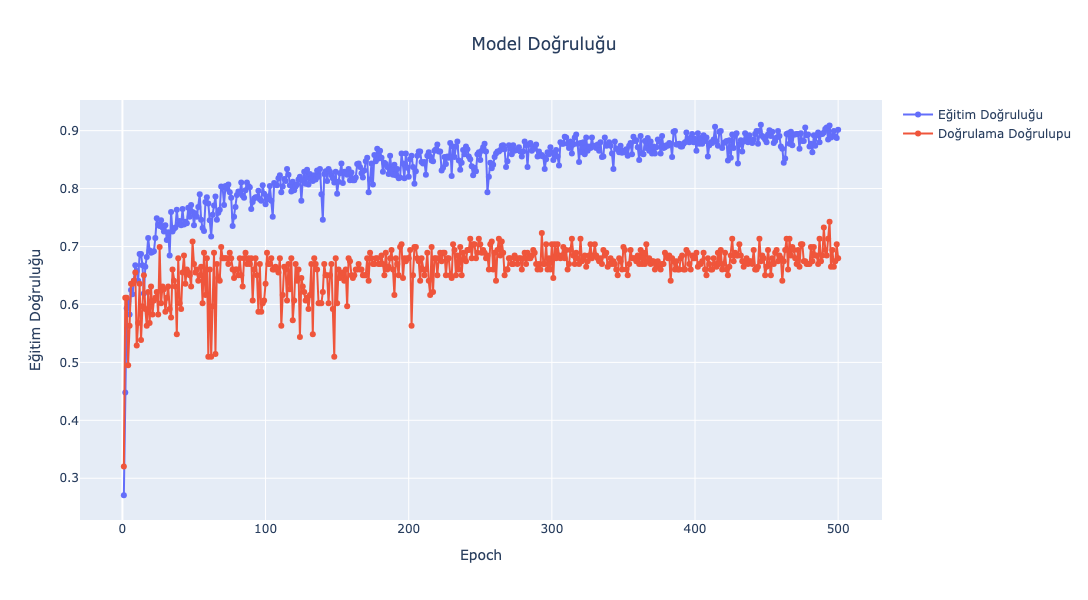

In [58]:
fig = go.Figure()

# Eğitim doğruluğunu ekle
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['accuracy']) + 1)),
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Eğitim Doğruluğu',
    hoverinfo='y'
))

# Doğrulama doğruluğunu ekle
fig.add_trace(go.Scatter(
    x=list(range(1, len(history.history['val_accuracy']) + 1)),
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Doğrulama Doğrulupu',
    hoverinfo='y'
))

# Grafik başlığı ve etiketleri
fig.update_layout(
    title={'text': 'Model Doğruluğu', 'x': 0.5, 'xanchor': 'center'},  
    xaxis_title='Epoch',
    yaxis_title='Eğitim Doğruluğu',
    width=1200, 
    height=600  
)

fig.show()

# Sonuç